<a href="https://colab.research.google.com/github/baoqdng/Customer_Transaction_Analytics/blob/main/Customer_Transaction_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/shtrausslearning/customer-transaction-predictive-analytics#3-%7C-EDA-:-ANZ-Customers


https://medium.com/nerd-for-tech/introduction-to-customer-analytics-4154483ef229

In [1]:
#Import library
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import plotly

# Data pre-processing


## 1. Initial Inspection

In [2]:
#Import dataset from kaggle
df = pd.read_csv('/content/drive/MyDrive/Dataset/anz.csv')
df.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,8/1/2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,8/1/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,8/1/2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,8/1/2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,8/1/2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
#Get dataset columns name
df.sort_index().columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [4]:
#Column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [5]:
#Numerical statistics
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


- Mean age of the transaction customer is 30.58 yrs old, the youngest is 18 and oldest is 78.
- Mean amount of the transaction is 187.93 AUD, the lowest is 0.10 AUD and highest is 8,835.98 AUD.
- Mean balance of customers is 14,740.19 AUD, the lowest is 0.24 AUD and highest is 267,128.52 AUD.

## DF adjustments

In [6]:
#Split 'merchant_long_lat' and 'long_lat' into two columns
mll = df['merchant_long_lat'].str.split(' ', expand=True) #split 'merchant_long_lat' by ' '
mll.columns = ['merchant_longtitude', 'merchant_lattitude'] #change mll columns name

ll = df['long_lat'].str.split(' ', expand=True) #split 'long_lat' by ' '
ll.columns = ['longtitude', 'lattitude'] #change ll columns name

df = df.drop(['merchant_long_lat', 'long_lat'], axis=1) #drop 'merchant_long_lat', 'long_lat' from dataframe
df = pd.concat([df, mll, ll], axis=1) #merge df and mll, ll
df.sort_index(axis=1, inplace=True) #sort object by label

In [7]:
df.head(5)

,account,age,amount,balance,bpay_biller_code,card_present_flag,country,currency,customer_id,date,extraction,first_name,gender,lattitude,longtitude,merchant_code,merchant_id,merchant_lattitude,merchant_longtitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description
0,ACC-1598451071,26,16.25,35.39,NaN,1.0,Australia,AUD,CUS-2487424745,8/1/2018,2018-08-01T01:01:15.000+0000,Diana,F,-27.95,153.41,NaN,81c48296-73be-44a7-befa-d053f48ce7cd,-27.99,153.38,QLD,Ashmore,debit,authorized,a623070bfead4541a6b0fff8a09e706c,POS
1,ACC-1598451071,26,14.19,21.20,NaN,0.0,Australia,AUD,CUS-2487424745,8/1/2018,2018-08-01T01:13:45.000+0000,Diana,F,-27.95,153.41,NaN,830a451c-316e-4a6a-bf25-e37caedca49e,-33.87,151.21,NSW,Sydney,debit,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS
2,ACC-1222300524,38,6.42,5.71,NaN,1.0,Australia,AUD,CUS-2142601169,8/1/2018,2018-08-01T01:26:15.000+0000,Michael,M,-33.94,151.23,NaN,835c231d-8cdf-4e96-859d-e9d571760cf0,-33.87,151.21,NSW,Sydney,debit,authorized,feb79e7ecd7048a5a36ec889d1a94270,POS
3,ACC-1037050564,40,40.90,2117.22,NaN,1.0,Australia,AUD,CUS-1614226872,8/1/2018,2018-08-01T01:38:45.000+0000,Rhonda,F,-27.66,153.10,NaN,48514682-c78a-4a88-b0da-2d6302e64673,-26.68,153.05,QLD,Buderim,debit,authorized,2698170da3704fd981b15e64a006079e,SALES-POS
4,ACC-1598451071,26,3.25,17.95,NaN,1.0,Australia,AUD,CUS-2487424745,8/1/2018,2018-08-01T01:51:15.000+0000,Diana,F,-27.95,153.41,NaN,b4e02c10-0852-4273-b8fd-7b3395e32eb0,-28.06,153.44,QLD,Mermaid Beach,debit,authorized,329adf79878c4cf0aeb4188b4691c266,SALES-POS


In [8]:
#Convert 'extraction' and 'date' dtype to datetime64
df['extraction'] = df['extraction'].astype('datetime64[ns]')
df['date'] = df['date'].astype('datetime64[ns]')
print(df['extraction'].dtype)
print(df['date'].dtype)

datetime64[ns]
datetime64[ns]


In [9]:
#Age category
df['bin_age'] = pd.cut(df['age'], [0, 20, 30, 40, 50, 60, 70, 100], labels=['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70>'])
df['bin_age']

0        20-30
1        20-30
2        30-40
3        30-40
4        20-30
         ...  
12038    20-30
12039      <20
12040    20-30
12041    60-70
12042    30-40
Name: bin_age, Length: 12043, dtype: category
Categories (7, object): ['<20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70>']

In [10]:
#Extract time based data
year = df['extraction'].dt.year #year
month = df['extraction'].dt.month #month
day = df['extraction'].dt.day #day
dow = df['extraction'].dt.dayofweek #day of week
hour = df['extraction'].dt.hour #hour
minute = df['extraction'].dt.minute #minute

#Store time in new df_time
df_time = pd.concat([year, month, day, dow, hour, minute], axis=1)
df_time.columns = ['year', 'month', 'day', 'dow', 'hour', 'minute']

#Merge df_time with df
df = pd.concat([df, df_time], axis=1)
df.head(5)

#Change day of the week from numerical to categorical
dict_day = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'} #create dictionary for day of the week
df['dow'] = df['extraction'].dt.dayofweek.map(dict_day) #map dict_day with dow
df = df.drop(['extraction'], axis=1) #drop extraction column

df.head(5)

,account,age,amount,balance,bpay_biller_code,card_present_flag,country,currency,customer_id,date,first_name,gender,lattitude,longtitude,merchant_code,merchant_id,merchant_lattitude,merchant_longtitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,dow,hour,minute
0,ACC-1598451071,26,16.25,35.39,NaN,1.0,Australia,AUD,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,81c48296-73be-44a7-befa-d053f48ce7cd,-27.99,153.38,QLD,Ashmore,debit,authorized,a623070bfead4541a6b0fff8a09e706c,POS,20-30,2018,8,1,Wednesday,1,1
1,ACC-1598451071,26,14.19,21.20,NaN,0.0,Australia,AUD,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,830a451c-316e-4a6a-bf25-e37caedca49e,-33.87,151.21,NSW,Sydney,debit,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS,20-30,2018,8,1,Wednesday,1,13
2,ACC-1222300524,38,6.42,5.71,NaN,1.0,Australia,AUD,CUS-2142601169,2018-08-01,Michael,M,-33.94,151.23,NaN,835c231d-8cdf-4e96-859d-e9d571760cf0,-33.87,151.21,NSW,Sydney,debit,authorized,feb79e7ecd7048a5a36ec889d1a94270,POS,30-40,2018,8,1,Wednesday,1,26
3,ACC-1037050564,40,40.90,2117.22,NaN,1.0,Australia,AUD,CUS-1614226872,2018-08-01,Rhonda,F,-27.66,153.10,NaN,48514682-c78a-4a88-b0da-2d6302e64673,-26.68,153.05,QLD,Buderim,debit,authorized,2698170da3704fd981b15e64a006079e,SALES-POS,30-40,2018,8,1,Wednesday,1,38
4,ACC-1598451071,26,3.25,17.95,NaN,1.0,Australia,AUD,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,b4e02c10-0852-4273-b8fd-7b3395e32eb0,-28.06,153.44,QLD,Mermaid Beach,debit,authorized,329adf79878c4cf0aeb4188b4691c266,SALES-POS,20-30,2018,8,1,Wednesday,1,51


## Missing data processing

In [11]:
#Count missing value in each column
df.isna().sum()

account                    0
age                        0
amount                     0
balance                    0
bpay_biller_code       11158
card_present_flag       4326
country                    0
currency                   0
customer_id                0
date                       0
first_name                 0
gender                     0
lattitude                  0
longtitude                 0
merchant_code          11160
merchant_id             4326
merchant_lattitude      4326
merchant_longtitude     4326
merchant_state          4326
merchant_suburb         4326
movement                   0
status                     0
transaction_id             0
txn_description            0
bin_age                    0
year                       0
month                      0
day                        0
dow                        0
hour                       0
minute                     0
dtype: int64

In [12]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

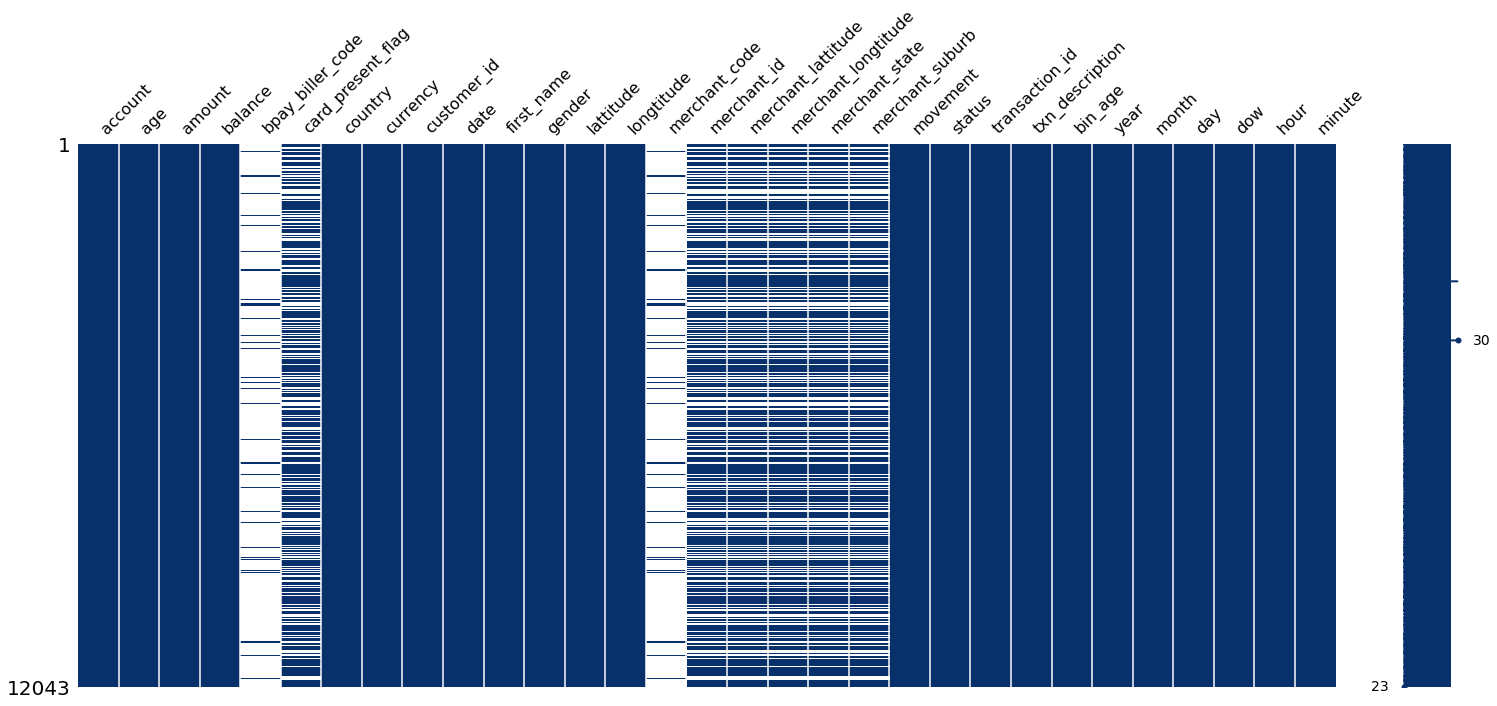

In [13]:
import missingno as msno #missing data visualation module
import matplotlib.pyplot as plt

fig = msno.matrix(df, color=(8/255,48/255,107/255))
plt.show()

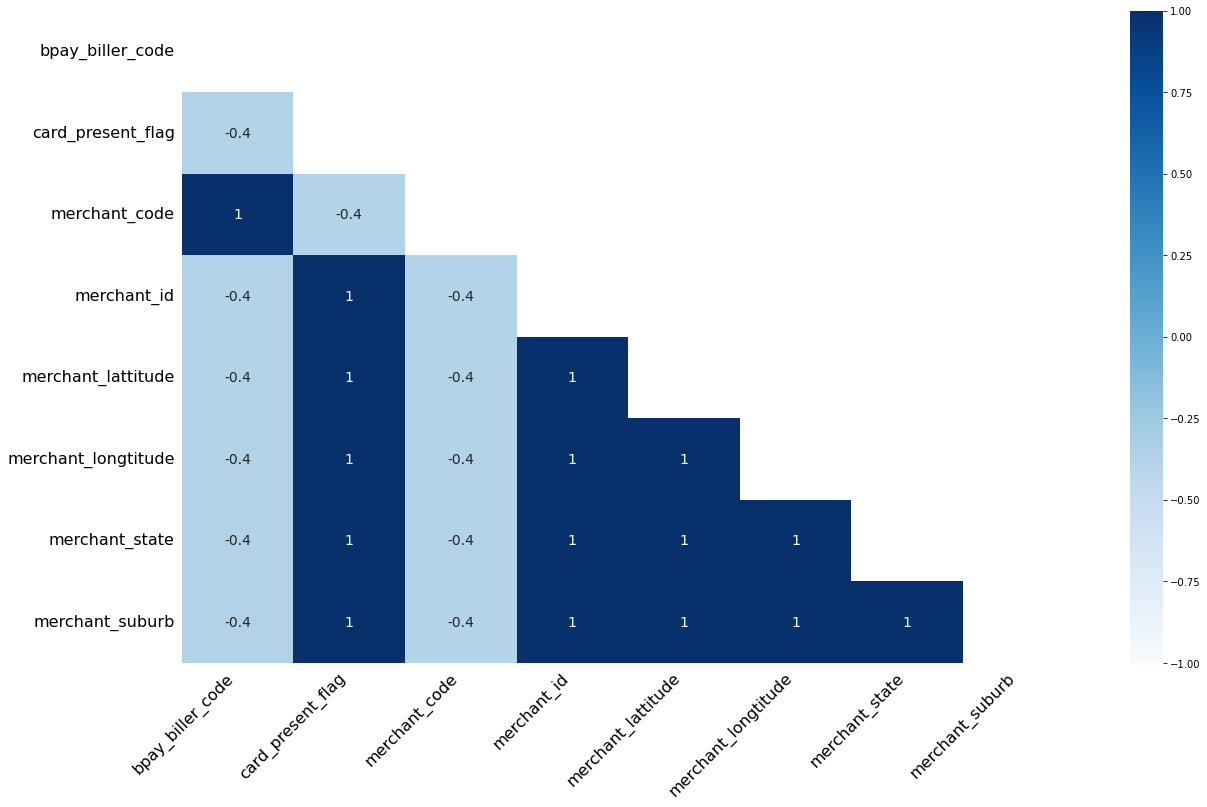

In [14]:
fig = msno.heatmap(df, cmap='Blues')
plt.show()

In [15]:
#Drop 'bpay_biller_code'
df = df.drop(['bpay_biller_code'], axis=1)
df.head(3)

,account,age,amount,balance,card_present_flag,country,currency,customer_id,date,first_name,gender,lattitude,longtitude,merchant_code,merchant_id,merchant_lattitude,merchant_longtitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,dow,hour,minute
0,ACC-1598451071,26,16.25,35.39,1.0,Australia,AUD,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,81c48296-73be-44a7-befa-d053f48ce7cd,-27.99,153.38,QLD,Ashmore,debit,authorized,a623070bfead4541a6b0fff8a09e706c,POS,20-30,2018,8,1,Wednesday,1,1
1,ACC-1598451071,26,14.19,21.20,0.0,Australia,AUD,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,830a451c-316e-4a6a-bf25-e37caedca49e,-33.87,151.21,NSW,Sydney,debit,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS,20-30,2018,8,1,Wednesday,1,13
2,ACC-1222300524,38,6.42,5.71,1.0,Australia,AUD,CUS-2142601169,2018-08-01,Michael,M,-33.94,151.23,NaN,835c231d-8cdf-4e96-859d-e9d571760cf0,-33.87,151.21,NSW,Sydney,debit,authorized,feb79e7ecd7048a5a36ec889d1a94270,POS,30-40,2018,8,1,Wednesday,1,26


## Feature processing

In [16]:
#Checking country and currency to make a standard value
print(df['country'].value_counts())
print(df['currency'].value_counts())

Australia    12043
Name: country, dtype: int64
AUD    12043
Name: currency, dtype: int64


- Our dataset is related to transactions made through the banking system. After checking the country and currency we can see that it comes from Australia so we can drop 'country' and 'currency' columns.

In [17]:
#Drop 'country' and 'currency' columns
df = df.drop(['country', 'currency'], axis=1)
df.head(3)

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,lattitude,longtitude,merchant_code,merchant_id,merchant_lattitude,merchant_longtitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,dow,hour,minute
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,81c48296-73be-44a7-befa-d053f48ce7cd,-27.99,153.38,QLD,Ashmore,debit,authorized,a623070bfead4541a6b0fff8a09e706c,POS,20-30,2018,8,1,Wednesday,1,1
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,830a451c-316e-4a6a-bf25-e37caedca49e,-33.87,151.21,NSW,Sydney,debit,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS,20-30,2018,8,1,Wednesday,1,13
2,ACC-1222300524,38,6.42,5.71,1.0,CUS-2142601169,2018-08-01,Michael,M,-33.94,151.23,NaN,835c231d-8cdf-4e96-859d-e9d571760cf0,-33.87,151.21,NSW,Sydney,debit,authorized,feb79e7ecd7048a5a36ec889d1a94270,POS,30-40,2018,8,1,Wednesday,1,26


In [18]:
cols = list(df.columns)
cols

['account',
 'age',
 'amount',
 'balance',
 'card_present_flag',
 'customer_id',
 'date',
 'first_name',
 'gender',
 'lattitude',
 'longtitude',
 'merchant_code',
 'merchant_id',
 'merchant_lattitude',
 'merchant_longtitude',
 'merchant_state',
 'merchant_suburb',
 'movement',
 'status',
 'transaction_id',
 'txn_description',
 'bin_age',
 'year',
 'month',
 'day',
 'dow',
 'hour',
 'minute']

In [19]:
#Get columns name that relate to merchant
merchs = []
for col in cols:
  if 'merchant' in col:
    merchs.append(col)

#Value counts for each feature that relate to merch
for merch in merchs:
  print(f'Features: {merch}', df[merch].value_counts())
  print('\n', '-'*30, '\n')

Features: merchant_code 0.0    883
Name: merchant_code, dtype: int64

 ------------------------------ 

Features: merchant_id 106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
6ddddc40-5b69-4253-8a26-167999a8bf96    10
                                        ..
5c011d61-fbbe-437f-9ffa-3d9910cd2c7a     1
9eff6ea8-061d-4e88-93a5-6711962d80ed     1
7747bd2b-e29e-486f-b6aa-ad20ec5f6971     1
a851a118-cfad-4232-8dec-f528125fc2a1     1
e5975ab4-08f7-4725-a369-24cc0e35ed6e     1
Name: merchant_id, Length: 5725, dtype: int64

 ------------------------------ 

Features: merchant_lattitude -37.82    232
-33.87    218
-37.81    201
-37.83    148
-27.47    106
         ... 
-32.42      1
-42.84      1
-32.32      1
-36.11      1
-16.84      1
Name: merchant_lattitude, Length: 669, dtype: int64

 ------------------------------ 

Features: merchant_longtitude 151.21    281
144.96

In [20]:
#Get columns name that relate to transaction
trans = ['amount','movement','status','transaction_id','txn_description', 'card_present_flag','date']

#Value counts for each feature that relate to merch
for tran in trans:
  print(f'Features: {tran}', df[tran].value_counts())
  print('\n', '-'*30, '\n')

Features: amount 33.00     168
39.00     119
29.00     116
36.00     107
45.00     102
         ... 
37.46       1
133.95      1
16.57       1
2.08        1
30.77       1
Name: amount, Length: 4457, dtype: int64

 ------------------------------ 

Features: movement debit     11160
credit      883
Name: movement, dtype: int64

 ------------------------------ 

Features: status authorized    7717
posted        4326
Name: status, dtype: int64

 ------------------------------ 

Features: transaction_id a623070bfead4541a6b0fff8a09e706c    1
cd8bcb85c55846b39224c9f05209ff38    1
cc47c4b329ae4a9ba13803455530a096    1
ff35cc1fbeff4443b9658253bc82ffe1    1
dc563fffa6a04c37b871bc4148a19e81    1
                                   ..
d2c47f9b4daf4304a48630624cf871eb    1
51d1a92e56ea4fb0907821d73113e642    1
2649c5bdfe1a4e8c9138c2a49d1ab14b    1
2085c18ea33c4a06aab92fff65045894    1
6d5218e04e8040b9996850ce11a19426    1
Name: transaction_id, Length: 12043, dtype: int64

 --------------------------

In [21]:
#Get columns name that relate to customer
ctms = ['account','customer_id','first_name','age','balance','gender']

#Value counts for each feature that relate to merch
for cus in ctms:
  print(f'Features: {cus}', df[cus].value_counts())
  print('\n', '-'*30, '\n')

Features: account ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

 ------------------------------ 

Features: customer_id CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

 ------------------------------ 

Features: first_name Michael      746
Diana        578
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan      31
Name: first_name, Length: 80, dtype: int64

 ------------------------------ 

Features: age 26    893
38    767


# Exploratory Data Analysis

In [22]:
import plotly.express as px

In [23]:
df.head(5)

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,lattitude,longtitude,merchant_code,merchant_id,merchant_lattitude,merchant_longtitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,dow,hour,minute
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,81c48296-73be-44a7-befa-d053f48ce7cd,-27.99,153.38,QLD,Ashmore,debit,authorized,a623070bfead4541a6b0fff8a09e706c,POS,20-30,2018,8,1,Wednesday,1,1
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,830a451c-316e-4a6a-bf25-e37caedca49e,-33.87,151.21,NSW,Sydney,debit,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS,20-30,2018,8,1,Wednesday,1,13
2,ACC-1222300524,38,6.42,5.71,1.0,CUS-2142601169,2018-08-01,Michael,M,-33.94,151.23,NaN,835c231d-8cdf-4e96-859d-e9d571760cf0,-33.87,151.21,NSW,Sydney,debit,authorized,feb79e7ecd7048a5a36ec889d1a94270,POS,30-40,2018,8,1,Wednesday,1,26
3,ACC-1037050564,40,40.90,2117.22,1.0,CUS-1614226872,2018-08-01,Rhonda,F,-27.66,153.10,NaN,48514682-c78a-4a88-b0da-2d6302e64673,-26.68,153.05,QLD,Buderim,debit,authorized,2698170da3704fd981b15e64a006079e,SALES-POS,30-40,2018,8,1,Wednesday,1,38
4,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,b4e02c10-0852-4273-b8fd-7b3395e32eb0,-28.06,153.44,QLD,Mermaid Beach,debit,authorized,329adf79878c4cf0aeb4188b4691c266,SALES-POS,20-30,2018,8,1,Wednesday,1,51


## Customers analysis

### Customer age distribution

In [24]:
#Customer age distribution
cus_age = df.groupby(['customer_id']).agg('mean')['age'].reset_index()

#Plot age distribution
fig = px.histogram(
    cus_age, 
    x='age', 
    nbins=100, 
    template='plotly_white', 
    title='Customer age distribution', 
    height=500,
    width=1500
)
fig.show()

- A large portion of customer is in the age group 19-21 years old.
- Only a small portion of customer is 50+ years old (there are three out liers 64, 69, 78).

### Customer name distribution

In [25]:
cus_name = df['customer_id'].groupby(df['first_name']).value_counts().nlargest(10)
cus_name = cus_name.drop(columns=['customer_id'])
cus_name

first_name  customer_id   
Diana       CUS-2487424745    578
Michael     CUS-2142601169    303
Tonya       CUS-3026014945    292
Kimberly    CUS-3378712515    260
Rhonda      CUS-1614226872    259
Jessica     CUS-1196156254    245
Joseph      CUS-2695611575    239
Richard     CUS-51506836      239
Jeffrey     CUS-860700529     233
Tiffany     CUS-1669695324    230
Name: customer_id, dtype: int64

In [26]:
cus_name = df.groupby(['customer_id']).first()['first_name'].value_counts()
cus_name.to_frame().reset_index()

#Plot customer recent
fig = px.bar(
    cus_name[:10], 
    y='first_name', 
    template='plotly_white', 
    title='Customer name', 
    height=500,
    width=1500,
    orientation='v'
)
fig.show()

In [27]:
# #Get top 10 recent customers
# cus_name = df['first_name'].value_counts().nlargest(10)
# cus_name.to_frame().reset_index()

# #Plot customer recent
# fig = px.bar(
#     cus_name, 
#     y='first_name', 
#     template='plotly_white', 
#     title='Customer name', 
#     height=500,
#     width=1500,
#     orientation='v'
# )
# fig.show()

In [28]:
#Gender distribution
gender = df.groupby(['customer_id']).first()['gender'].value_counts()
gender.to_frame().reset_index()
gender

#Plot gender distribution
fig = px.bar(
    gender,
    y="gender",
    template='plotly_white', 
    title='Customer gender distribution', 
    height=500,
    width=1500,
    orientation='v'
)
fig.show()

- The most common first name of customers are Michael, Kimberley and Richard.
- There are a lot of male customers than female customers.

## Transaction analysis

### Transaction distribution

In [29]:
#Type of transaction
type_of_trans = df['movement'].value_counts()
type_of_trans.to_frame().reset_index()

#Plot distribution for type of transaction
fig = px.bar(
    type_of_trans,
    y='movement',
    template='plotly_white', 
    title='Movement distribution', 
    # height=500,
    # width=500,
    orientation='v'
)
fig.show()

### Transaction status distribution

In [30]:
#Transaction status: Authorised and Posted
type_of_trans = df['status'].value_counts()
type_of_trans.to_frame().reset_index()

#Plot distribution for type of transaction
fig = px.bar(
    type_of_trans,
    y='status',
    template='plotly_white', 
    title='Transaction status', 
    # height=500,
    # width=500,
    orientation='v'
)
fig.show()

### Transaction description distribution

In [31]:
#Transaction description
des_trans = df['txn_description'].value_counts()
des_trans.to_frame().reset_index()

#Plot transaction distribution
fig = px.bar(
    des_trans,
    y='txn_description',
    template='plotly_white', 
    title='Transaction description', 
    # height=500,
    # width=500,
    orientation='v'
)
fig.show()

In [32]:
#Card presence
card_presence = df['card_present_flag'].value_counts(dropna=False)
card_presence   

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

## Credit Subset: This part is about salary payments

In [33]:
df.head(5)

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,lattitude,longtitude,merchant_code,merchant_id,merchant_lattitude,merchant_longtitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,dow,hour,minute
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,81c48296-73be-44a7-befa-d053f48ce7cd,-27.99,153.38,QLD,Ashmore,debit,authorized,a623070bfead4541a6b0fff8a09e706c,POS,20-30,2018,8,1,Wednesday,1,1
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,830a451c-316e-4a6a-bf25-e37caedca49e,-33.87,151.21,NSW,Sydney,debit,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS,20-30,2018,8,1,Wednesday,1,13
2,ACC-1222300524,38,6.42,5.71,1.0,CUS-2142601169,2018-08-01,Michael,M,-33.94,151.23,NaN,835c231d-8cdf-4e96-859d-e9d571760cf0,-33.87,151.21,NSW,Sydney,debit,authorized,feb79e7ecd7048a5a36ec889d1a94270,POS,30-40,2018,8,1,Wednesday,1,26
3,ACC-1037050564,40,40.90,2117.22,1.0,CUS-1614226872,2018-08-01,Rhonda,F,-27.66,153.10,NaN,48514682-c78a-4a88-b0da-2d6302e64673,-26.68,153.05,QLD,Buderim,debit,authorized,2698170da3704fd981b15e64a006079e,SALES-POS,30-40,2018,8,1,Wednesday,1,38
4,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,b4e02c10-0852-4273-b8fd-7b3395e32eb0,-28.06,153.44,QLD,Mermaid Beach,debit,authorized,329adf79878c4cf0aeb4188b4691c266,SALES-POS,20-30,2018,8,1,Wednesday,1,51


### Quarterly payment average

In [34]:
cus_income = df[df['movement']=='credit'].groupby('customer_id')['amount'].sum()
monthly_cus_income = cus_income/3
monthly_cus_income.describe()

count      100.000000
mean      5588.589500
std       2247.181239
min       2385.320000
25%       3863.777500
50%       4937.828333
75%       7110.838333
max      11781.306667
Name: amount, dtype: float64

- An average monthly salary of customer is 5588 AUD.
- The smallest average monthly salary is 2385 AUD.
- The highest average monthly salary is 11781 AUD.

### Customer segmentation by Salary

In [35]:
monthly_cus_income = monthly_cus_income.reset_index()
monthly_cus_income

,customer_id,amount
0,CUS-1005756958,4205.370000
1,CUS-1117979751,8350.183333
2,CUS-1140341822,3833.020000
3,CUS-1147642491,7416.023333
4,CUS-1196156254,9108.703333
...,...,...
95,CUS-72755508,2901.280000
96,CUS-809013380,4493.970000
97,CUS-860700529,3617.240000
98,CUS-880898248,2867.960000


In [36]:
#Count customer has income below mean Salary
count = 0

for i in range(len(monthly_cus_income)):
  if monthly_cus_income['amount'][i] < 5588:
    count += 1

print(count)

61


In [37]:
monthly_cus_income = monthly_cus_income.sort_values(by='amount', ascending=False) #Sort monthly customer income

#Top 30 customers who have the highest mean Salary
high_income = monthly_cus_income[:30].reset_index()
high_income
#Plot 30 customers mean Salary
fig = px.bar(
    high_income, 
    x='customer_id',
    y='amount',
    template='plotly_white', 
    title='Top 30 highest average income per month', 
    orientation='v'
)
fig.show()

In [38]:
#Top 40 customers who have the middle mean Salary
mid_income = monthly_cus_income[30:70].reset_index()
mid_income
#Plot 30 customers mean Salary
fig = px.bar(
    mid_income, 
    x='customer_id',
    y='amount',
    template='plotly_white', 
    title='Top 40 middle average income per month', 
    orientation='v'
)
fig.show()

In [39]:
#Top 30 customers who have the lowest mean Salary
low_income = monthly_cus_income[-30:].reset_index()
low_income
#Plot 30 customers mean Salary
fig = px.bar(
    low_income, 
    x='customer_id',
    y='amount',
    template='plotly_white', 
    title='Top 30 lowest average income per month', 
    orientation='v'
)
fig.show()

## Debit subset

In [40]:
#Take debit subset from dataframe 
debit = df[df['movement']=='debit']
debit.head(5)

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,lattitude,longtitude,merchant_code,merchant_id,merchant_lattitude,merchant_longtitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,dow,hour,minute
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,81c48296-73be-44a7-befa-d053f48ce7cd,-27.99,153.38,QLD,Ashmore,debit,authorized,a623070bfead4541a6b0fff8a09e706c,POS,20-30,2018,8,1,Wednesday,1,1
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,830a451c-316e-4a6a-bf25-e37caedca49e,-33.87,151.21,NSW,Sydney,debit,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS,20-30,2018,8,1,Wednesday,1,13
2,ACC-1222300524,38,6.42,5.71,1.0,CUS-2142601169,2018-08-01,Michael,M,-33.94,151.23,NaN,835c231d-8cdf-4e96-859d-e9d571760cf0,-33.87,151.21,NSW,Sydney,debit,authorized,feb79e7ecd7048a5a36ec889d1a94270,POS,30-40,2018,8,1,Wednesday,1,26
3,ACC-1037050564,40,40.90,2117.22,1.0,CUS-1614226872,2018-08-01,Rhonda,F,-27.66,153.10,NaN,48514682-c78a-4a88-b0da-2d6302e64673,-26.68,153.05,QLD,Buderim,debit,authorized,2698170da3704fd981b15e64a006079e,SALES-POS,30-40,2018,8,1,Wednesday,1,38
4,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,b4e02c10-0852-4273-b8fd-7b3395e32eb0,-28.06,153.44,QLD,Mermaid Beach,debit,authorized,329adf79878c4cf0aeb4188b4691c266,SALES-POS,20-30,2018,8,1,Wednesday,1,51


### Total debit payment by age

In [41]:
#Get total spend by age
debit_by_age = debit.groupby('bin_age').sum()['amount']
debit_by_age = debit_by_age.reset_index()

#Plot total debit spent amount
fig = px.bar(
    debit_by_age,
    x='bin_age',
    y='amount',
    template='plotly_white',
    title='Total debit spend amount by Age and Month',
    orientation='v'
)
fig.show()

### Total debit payment by Age and Month

In [42]:
#Get total spend by age
debit_by_age_month = debit.groupby(['bin_age', 'month']).sum()['amount']
debit_by_age_month = debit_by_age_month.reset_index()

#Plot total debit spent amount
fig = px.bar(
    debit_by_age_month,
    x='bin_age',
    y='amount',
    facet_col='month',
    facet_col_wrap=3,
    template='plotly_white',
    title='Total debit spend amount by Age and Month',
    orientation='v'
)
fig.show()

### Total debit payment by Age and DOW

In [43]:
#Get total spend by age
debit_by_age_dow = debit.groupby(['bin_age', 'dow']).sum()['amount']
debit_by_age_dow = debit_by_age_dow.reset_index()

#Plot total debit spent amount
fig = px.bar(
    debit_by_age_dow,
    x='dow',
    y='amount',
    facet_col='bin_age',
    facet_col_wrap=1,
    category_orders={'dow':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']},
    template='plotly_white',
    title='Total debit spend amount by Age and DOW',
    orientation='v',
)
fig.update_layout(height=1400,
                  xaxis1_showticklabels=True,
                  xaxis2_showticklabels=True,
                  xaxis3_showticklabels=True,
                  xaxis4_showticklabels=True,
                  xaxis5_showticklabels=True,
                  xaxis6_showticklabels=True,
                  xaxis7_showticklabels=True
)
fig.show()

- **<20** spend more on Wednesdays (14.7k AUD) and least on Mondays (8.7k AUD).
- **20-30** spend more on Wednesdays (37.71k AUD) and least on Mondays (26.66k AUD) .
- **30-40** spend more on Saturdays (32.69k AUD) and least on Mondays (18.89k AUD).
- **40-50** spend more on Saturdays (16.2k AUD) and least on Mondays (7.8k AUD).
- **50-60** spend more on Wednesdays (2682 AUD) and least on Mondays (642 AUD).
- **60-70** spend more on Thurdays (1365 AUD) and least on Mondays (339 AUD).
- **>70** spend more on Fridays (677 AUD) and least on Tuesdays.

### Total debit payment by Age and Hour

In [44]:
#Get total spend by age
debit_by_age_hour = debit.groupby(['bin_age', 'hour']).sum()['amount']
debit_by_age_hour = debit_by_age_hour.reset_index()

#Plot total debit spent amount
fig = px.bar(
    debit_by_age_hour,
    x='hour',
    y='amount',
    animation_frame='bin_age',
    facet_col_wrap=1,
    template='plotly_white',
    title='Total debit spend amount by Age and Hour',
    orientation='v',
)
fig.show()

- **<20** spend more at 9 PM (7.4k) & least at 0 AM (386)
- **20-30** spend more at 2 PM (18.2k) & least at 0 AM (1.5k)
- **30-40** spend more at 9 AM (18.05k) & least at 0 AM (934)
- **40-50** spend more at 11 AM (10.8k) & least at 3 AM (67)
- **50-60** spend more at 10 AM (2.2k) & least at 0 AM (0)
- **60-70** spend more at 8 PM (1k) & least at 0 AM (0)
- **>70** spend more at 9 PM (494) & least at 0 AM (0)

In [45]:
fig = px.histogram(
    debit_by_age_hour,
    x='hour',
    y='amount',
    nbins=10,
    cumulative=True,
    color='bin_age',
    template='plotly_white',
    title='Total debit spend amount by Age and Hour',
)
fig.show()

### Debit payment distribution

In [46]:
#Plot debit payment distribution
fig = px.histogram(
    debit,
    x='amount',
    template='plotly_white',
    title='Debit data distribution',
)
fig.update_layout(xaxis={'dtick':300}) #Change dtick level
fig.show()

In [47]:
#Plot debit payment distribution
fig = px.histogram(
    debit,
    x='amount',
    nbins=5000,
    template='plotly_white',
    title='Debit data distribution'
)
fig.update_layout(xaxis={'dtick':30}) #Change dtick level
fig.update_xaxes(range=[0, 500]) #Change x axis range
fig.show()

### Total debit payment/count by Gender and Hour

In [70]:
#Get total debit amount by gender and hour
debit_by_gender_hour = df.groupby(['hour', 'month', 'gender']).agg(['count', 'sum'])[['amount']]
debit_by_gender_hour = debit_by_gender_hour.reset_index()
debit_by_gender_hour.columns = ['hour', 'month', 'gender', 'transaction_count', 'transaction_amount']

#Plot total debit amount by gender and hour
fig = px.bar(
    debit_by_gender_hour,
    x='hour',
    y='transaction_count',
    facet_col='month',
    facet_col_wrap=1,
    color='gender',
    barmode='group',
    template='plotly_white',
    title='Hourly transaction count by Month'
)
fig.update_layout(height=1400,
                  xaxis1_showticklabels=True,
                  xaxis2_showticklabels=True,
                  xaxis3_showticklabels=True,
)
fig.show()

### Total debit payment/count by Gender and DOW

In [71]:
#Get total debit amount by gender and hour
debit_by_gender_dow = df.groupby(['hour', 'dow', 'gender']).agg(['count', 'sum'])[['amount']]
debit_by_gender_dow = debit_by_gender_dow.reset_index()
debit_by_gender_dow.columns = ['hour', 'dow', 'gender', 'transaction_count', 'transaction_amount']
debit_by_gender_dow

#Plot total debit amount by gender and hour
fig = px.bar(
    debit_by_gender_dow,
    x='hour',
    y='transaction_count',
    facet_col='dow',
    facet_col_wrap=1,
    color='gender',
    barmode='group',
    template='plotly_white',
    title='Hourly transaction count by DOW'
)
fig.update_layout(height=1400,
                  xaxis1_showticklabels=True,
                  xaxis2_showticklabels=True,
                  xaxis3_showticklabels=True,
                  xaxis4_showticklabels=True,
                  xaxis5_showticklabels=True,
                  xaxis6_showticklabels=True,
                  xaxis7_showticklabels=True
)
fig.show()

## Annual salary of Customers

### Payment Abnormalities

In [73]:
trans_des = dict(tuple(df.groupby('txn_description')))
salary = trans_des['PAY/SALARY']
salary.head(5)

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,lattitude,longtitude,merchant_code,merchant_id,merchant_lattitude,merchant_longtitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,dow,hour,minute
50,ACC-588564840,23,3903.95,8342.11,NaN,CUS-1462656821,2018-08-01,Isaiah,M,-33.76,151.27,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,9ca281650e5d482d9e53f85e959baa66,PAY/SALARY,20-30,2018,8,1,Wednesday,11,0
61,ACC-1650504218,23,1626.48,2040.58,NaN,CUS-2500783281,2018-08-01,Marissa,F,-37.93,145.01,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,1822eb0e1bbe4c9e95ebbb0fa2cc4323,PAY/SALARY,20-30,2018,8,1,Wednesday,12,0
64,ACC-3326339947,22,983.36,3158.51,NaN,CUS-326006476,2018-08-01,Eric,M,-33.80,151.18,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,bd62b1799a454cedbbb56364f7c40cbf,PAY/SALARY,20-30,2018,8,1,Wednesday,12,0
68,ACC-3541460373,24,1408.08,2517.66,NaN,CUS-1433879684,2018-08-01,Jeffrey,M,-37.83,145.00,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,0d95c7c932bb48e5b44c2637bdd3efe9,PAY/SALARY,20-30,2018,8,1,Wednesday,13,0
70,ACC-2776252858,43,1068.04,2271.79,NaN,CUS-4123612273,2018-08-01,Kristin,F,-37.76,144.95,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,f50ccf1195214d14a0acbfcb5a265193,PAY/SALARY,40-50,2018,8,1,Wednesday,13,0


### Salary payment periodicity

In [75]:
def show_account_transaction(account_id):
  '''
  This fucntion that will show all transaction made for an acount
  '''
  return dict(tuple(salary.groupby('account')))[account_id]

In [78]:
show_account_transaction('ACC-588564840')

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,lattitude,longtitude,merchant_code,merchant_id,merchant_lattitude,merchant_longtitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,dow,hour,minute
50,ACC-588564840,23,3903.95,8342.11,NaN,CUS-1462656821,2018-08-01,Isaiah,M,-33.76,151.27,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,9ca281650e5d482d9e53f85e959baa66,PAY/SALARY,20-30,2018,8,1,Wednesday,11,0
1826,ACC-588564840,23,3903.95,10724.87,NaN,CUS-1462656821,2018-08-15,Isaiah,M,-33.76,151.27,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,a0ba656db7c5441dbb782f4bbc6755ac,PAY/SALARY,20-30,2018,8,15,Wednesday,11,0
3553,ACC-588564840,23,3903.95,13030.74,NaN,CUS-1462656821,2018-08-29,Isaiah,M,-33.76,151.27,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,0d496e23bf2d461eb3ac886c1a16f3b4,PAY/SALARY,20-30,2018,8,29,Wednesday,11,0
5419,ACC-588564840,23,3903.95,15523.69,NaN,CUS-1462656821,2018-09-12,Isaiah,M,-33.76,151.27,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,4e8da0f42d534b919b2b5c045204d8cf,PAY/SALARY,20-30,2018,9,12,Wednesday,11,0
7291,ACC-588564840,23,3903.95,17906.31,NaN,CUS-1462656821,2018-09-26,Isaiah,M,-33.76,151.27,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,3885424223de46eb894231ee607c28f2,PAY/SALARY,20-30,2018,9,26,Wednesday,11,0
9162,ACC-588564840,23,3903.95,21236.51,NaN,CUS-1462656821,2018-10-10,Isaiah,M,-33.76,151.27,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,0726e97b3df44344b4b7d0f762d7801a,PAY/SALARY,20-30,2018,10,10,Wednesday,11,0
11035,ACC-588564840,23,3903.95,24451.16,NaN,CUS-1462656821,2018-10-24,Isaiah,M,-33.76,151.27,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,d14a8667671948e8b688486d2f97d97f,PAY/SALARY,20-30,2018,10,24,Wednesday,11,0


In [86]:
salary['payment_period'] = salary.groupby('customer_id')['date'].diff(1)
salary['payment_period'] = salary['payment_period'].dropna()
salary['payment_period'].value_counts()

7 days     478
14 days    279
0 days       7
28 days      5
31 days      5
30 days      5
29 days      2
32 days      1
61 days      1
Name: payment_period, dtype: int64

- The interval between payment are done on 7 days or 14 days.
- Some unusual payment are payed in 0, 28, 30, 31 and more days below.

### Finding abnormal salary payment

In [92]:
salary['payment_period_str'] = salary['payment_period'].astype('str') #change datatype from datetime to str
customer_salary = dict(tuple(salary.groupby('customer_id'))) #groupby customer_id

lst_abnormal = [] #list of customer_id with abnormal salary payment
dict_abnormal = {} #dict storage all abnormal payment data

for id, data in customer_salary.items():
  rm_value = ['7 days', '14 days', 'NaT'] #values that need to be remove
  pattern = '|'.join(rm_value) #pattern contains remove values
  result = data.loc[~data['payment_period_str'].str.contains(pattern, case=False)] #take row that is not contain remove values in pattern

  if (result.shape[0]>0):
    lst_abnormal.append(id) #store the key of abnornal account
    dict_abnormal[id] = data #store the abnormal key and value account data

In [105]:
for i in range(len(lst_abnormal)):
  print(lst_abnormal[i])

CUS-1604596597
CUS-1739931018
CUS-1816693151
CUS-2110742437
CUS-2178051368
CUS-2283904812
CUS-2376382098
CUS-2599279756
CUS-3462882033
CUS-423725039
CUS-497688347
CUS-51506836
CUS-860700529
CUS-880898248
